In [2]:
import pandas as pd 

## Listings.csv

In [3]:
raw_lists = pd.read_csv("raw/listings.csv")
print(raw_lists.columns)


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# Remove dummy columns
dummy_cols = []
for col in raw_lists.columns:
    if len(raw_lists[col].unique())==1:
        dummy_cols.append(col)
        print(col)
raw_lists.drop(dummy_cols,axis=1,inplace=True)

scrape_id
experiences_offered
thumbnail_url
medium_url
xl_picture_url
host_acceptance_rate
neighbourhood_group_cleansed
has_availability
requires_license
is_business_travel_ready


In [6]:
text_cols = ['name',
             'summary','space', 'description', 'neighborhood_overview','notes',
             'listing_url','transit', 'access', 'interaction', 'house_rules', 
             'picture_url','host_url', 'host_name', 'host_location','host_about','host_thumbnail_url',
             'host_picture_url',]

workable_cols = ['id',  'host_id', 'host_since', 'host_response_time', 'host_response_rate',  'host_is_superhost', 
        'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed','zipcode', 'market','country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month']
 


In [10]:
raw_lists[workable_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11922 entries, 0 to 11921
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11922 non-null  int64  
 1   host_id                           11922 non-null  int64  
 2   host_since                        11916 non-null  object 
 3   host_response_time                7909 non-null   object 
 4   host_response_rate                7909 non-null   object 
 5   host_is_superhost                 11916 non-null  object 
 6   host_neighbourhood                9718 non-null   object 
 7   host_listings_count               11916 non-null  float64
 8   host_total_listings_count         11916 non-null  float64
 9   host_verifications                11922 non-null  object 
 10  host_has_profile_pic              11916 non-null  object 
 11  host_identity_verified            11916 non-null  object 
 12  stre

In [12]:
corr = raw_lists[workable_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,host_listings_count,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
id,1.000000,0.502371,0.095952,0.095952,-0.031375,-0.047621,0.102857,-0.001761,-0.017138,-0.035303,-0.010471,-0.229067,0.020575,-0.035903,-0.024668,0.082517,0.093976,0.092022,-0.089032,-0.361878,0.013070,-0.006122,0.014827,-0.049648,-0.037096,-0.003686,0.003253,0.544105,0.055895,0.219017
host_id,0.502371,1.000000,-0.045311,-0.045311,-0.009150,0.013682,0.044169,-0.011263,0.007933,-0.014452,-0.009637,-0.289547,0.041397,-0.040156,-0.042734,0.068501,0.070668,0.069230,-0.025562,-0.189169,-0.003972,-0.015248,-0.010695,-0.029028,-0.018068,0.017331,-0.002714,0.349217,0.023062,0.134316
host_listings_count,0.095952,-0.045311,1.000000,1.000000,0.002378,-0.064184,-0.014620,0.034709,0.026150,-0.003561,0.019360,-0.200843,0.090383,-0.033738,0.043035,0.002099,0.009699,0.008026,0.029076,-0.079827,-0.101173,-0.075176,-0.019037,-0.110418,-0.111554,-0.076290,-0.124996,-0.287226,0.487962,-0.091761
host_total_listings_count,0.095952,-0.045311,1.000000,1.000000,0.002378,-0.064184,-0.014620,0.034709,0.026150,-0.003561,0.019360,-0.200843,0.090383,-0.033738,0.043035,0.002099,0.009699,0.008026,0.029076,-0.079827,-0.101173,-0.075176,-0.019037,-0.110418,-0.111554,-0.076290,-0.124996,-0.287226,0.487962,-0.091761
zipcode,-0.031375,-0.009150,0.002378,0.002378,1.000000,0.074609,-0.044168,-0.009273,-0.013809,0.010642,-0.004597,0.003007,0.010141,0.005227,0.003934,-0.034768,-0.035850,-0.033557,-0.025931,0.013800,0.042845,0.019449,0.040243,-0.005989,0.010525,-0.009957,0.012553,0.180812,0.005609,0.011484
latitude,-0.047621,0.013682,-0.064184,-0.064184,0.074609,1.000000,-0.389336,0.039635,0.130971,0.131568,0.053607,0.287713,0.047480,0.051676,0.034016,-0.012827,-0.023130,-0.028082,0.049009,-0.072901,0.025106,0.025284,-0.015686,0.024239,0.012914,0.096046,0.010450,-0.188331,0.039199,-0.136217
longitude,0.102857,0.044169,-0.014620,-0.014620,-0.044168,-0.389336,1.000000,-0.231816,-0.194409,-0.190829,-0.200391,-0.279700,-0.140334,-0.011313,-0.019983,-0.029885,-0.007593,0.002406,-0.139818,0.019322,0.054203,0.032317,0.067992,0.026318,0.031061,-0.160586,0.116549,0.283486,-0.235851,0.135862
accommodates,-0.001761,-0.011263,0.034709,0.034709,-0.009273,0.039635,-0.231816,1.000000,0.679638,0.808586,0.870802,0.652676,0.543609,-0.041129,0.021203,0.076565,0.040329,0.047103,0.203448,-0.068451,-0.054875,-0.067895,-0.052457,-0.037455,-0.052101,-0.001364,-0.108162,-0.267895,0.246619,-0.087385
bathrooms,-0.017138,0.007933,0.026150,0.026150,-0.013809,0.130971,-0.194409,0.679638,1.000000,0.735953,0.644823,0.559847,0.398362,0.018205,0.009819,0.062041,0.031209,0.029218,0.148983,-0.132780,-0.016884,-0.035564,-0.037862,-0.026030,-0.052524,0.012833,-0.068419,-0.188152,0.222644,-0.187217
bedrooms,-0.035303,-0.014452,-0.003561,-0.003561,0.010642,0.131568,-0.190829,0.808586,0.735953,1.000000,0.775834,0.595437,0.484226,-0.003845,0.008712,0.039335,0.002061,0.006322,0.150666,-0.116444,-0.022678,-0.025725,-0.035876,-0.008554,-0.034733,0.000931,-0.073848,-0.272412,0.208124,-0.182594


In [23]:
import matplotlib.pyplot as plt

count    11922.000000
mean       212.707851
std        306.991755
min          0.000000
25%         80.000000
50%        130.000000
75%        249.000000
max      10000.000000
Name: price, dtype: float64

In [29]:
lists[lists.price>10]["price"].describe()

count    11914.000000
mean       212.845644
std        307.048718
min         13.000000
25%         80.000000
50%        130.000000
75%        249.000000
max      10000.000000
Name: price, dtype: float64

(-1.0, 2000.0)

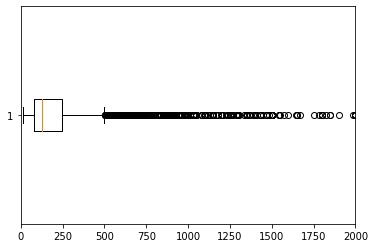

In [34]:
plt.boxplot(lists[lists.price>10]["price"],vert=False)
plt.xlim(-1,2000)

(-1.0, 2000.0)

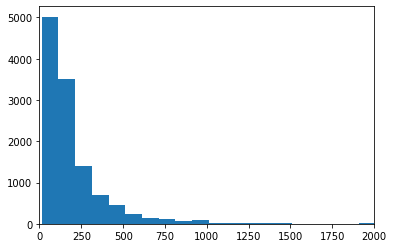

In [37]:
plt.hist(lists[lists.price>10]["price"],bins=100)
plt.xlim(-1,2000)

In [38]:
import seaborn as sns

(-10.0, 1500.0)

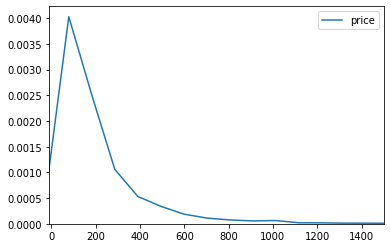

In [42]:
sns.kdeplot(lists[lists.price>10]["price"])
plt.xlim(-10,1500)

In [43]:
lists.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

(-10.0, 1500.0)

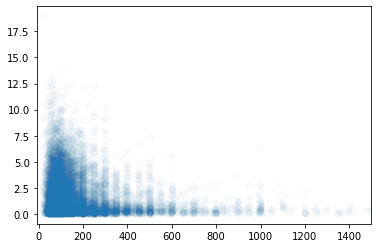

In [52]:
plt.scatter(lists[lists.price>10]["price"],lists[lists.price>10]["reviews_per_month"],alpha=.02)
plt.xlim(-10,1500)

TypeError: 'Series' object is not callable